# Working with real TF in-Built Datasets

In [1]:
import tensorflow as tf
import tensorflow_datasets as TFDS
from tensorflow.keras.datasets import imdb

# Internet Movie Database (IMDb) : Most widely used movie reviews dataset for ML Processing. Obj. is to identify positive or negative reviews and determine sentiment.

In [2]:
#imbd_sentences = []
#train_data = TFDS.as_numpy(TFDS.load('imdb_reviews', split = "train"))

# https://www.tensorflow.org/datasets/catalog/overview

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\Dr.PVVK\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Dr.PVVK\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you m

In [4]:
print("train_data", train_data.shape)
print("train_labels ", train_labels.shape)
print("_"*100)
print("test_data ", test_data.shape)
print("test_labels ", test_labels.shape)
print("_"*100)
print("Maximum value of a word index ")
print(max([max(sequence) for sequence in train_data]))
print("Maximum length num words of review in train ")
print(max([len(sequence) for sequence in train_data]))

train_data (25000,)
train_labels  (25000,)
____________________________________________________________________________________________________
test_data  (25000,)
test_labels  (25000,)
____________________________________________________________________________________________________
Maximum value of a word index 
9999
Maximum length num words of review in train 
2494


# What's inside my train_data

In [5]:
# train_data

# Let's See an actual review in words

In [6]:
word_index = imdb.get_word_index()

# # Reverse from integers to words using the DICTIONARY

In [7]:
reverse_word_index = dict([value,key] for (key, value) in word_index.items())

In [8]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [9]:
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[12]])

In [10]:
decoded_review

"? i love cheesy horror flicks i don't care if the acting is sub par or whether the monsters look corny i liked this movie except for the ? feeling all the way from the beginning of the film to the very end look i don't need a 10 page ? or a sign with big letters explaining a plot to me but dark floors takes the what is this movie about thing to a whole new annoying level what is this movie about br br this isn't exceptionally scary or thrilling but if you have an hour and a half to kill and or you want to end up feeling frustrated and confused rent this winner"

# Vectorize Text data into Numbers -  - - -   - Use One Hot Encoding Mothod.

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [12]:
tokenizer = Tokenizer(num_words = 10000)

In [13]:
tokenizer.fit_on_texts(word_index)

In [18]:
print(train_data.shape)

(25000,)


In [29]:
import numpy as np
def vectorize_sequences(sequences, dimensions = 10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [33]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [35]:
x_train.shape, x_test.shape

((25000, 10000), (25000, 10000))

# Vectorize labels Too as Floats into Tensors

In [39]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
y_train.shape, y_test

((25000,), array([0., 1., 1., ..., 0., 0., 0.], dtype=float32))

# Set Aside a Validation Set

In [49]:
x_val = x_train[:10000]
remain_x_train = x_train[10000:]
y_val = y_train[:10000]
remain_y_train = y_train[10000:]

In [50]:
x_val.shape, remain_x_train.shape, y_val.shape, remain_y_train.shape

((10000, 10000), (15000, 10000), (10000,), (15000,))

# Defien a dense ANN model to learn from this data

In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l1(0.001), activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, kernel_regularizer = tf.keras.regularizers.l1(0.001), activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                160016    
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

In [79]:
history = model.fit(remain_x_train, remain_y_train, epochs = 100, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/100
30/30 [==============================] - 1s 20ms/step - loss: 0.6322 - acc: 0.8425 - val_loss: 0.5960 - val_acc: 0.8542
Epoch 2/100
30/30 [==============================] - 0s 13ms/step - loss: 0.6200 - acc: 0.8472 - val_loss: 0.6395 - val_acc: 0.8275
Epoch 3/100
30/30 [==============================] - 0s 14ms/step - loss: 0.6192 - acc: 0.8494 - val_loss: 0.5795 - val_acc: 0.8632
Epoch 4/100
30/30 [==============================] - 0s 12ms/step - loss: 0.6171 - acc: 0.8513 - val_loss: 0.5927 - val_acc: 0.8484
Epoch 5/100
30/30 [==============================] - 0s 12ms/step - loss: 0.6121 - acc: 0.8511 - val_loss: 0.5622 - val_acc: 0.8705
Epoch 6/100
30/30 [==============================] - 0s 12ms/step - loss: 0.6061 - acc: 0.8557 - val_loss: 0.6159 - val_acc: 0.8428
Epoch 7/100
30/30 [==============================] - 0s 12ms/step - loss: 0.6084 - acc: 0.8573 - val_loss: 0.6741 - val_acc: 0.8126
Epoch 8/100
30/30 [==============================] - 0s 12ms/step - loss: 0.

In [80]:
results = model.evaluate(x_test,y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.5926 - acc: 0.8546


In [81]:
print('test_loss         and    test_accuracy')
print(results)

test_loss         and    test_accuracy
[0.5925513505935669, 0.854640007019043]


# Save Model if you want in a dict format

In [82]:
history_dict = history.history

In [83]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

# Plot Loss and Accuracy . ..... .. . 

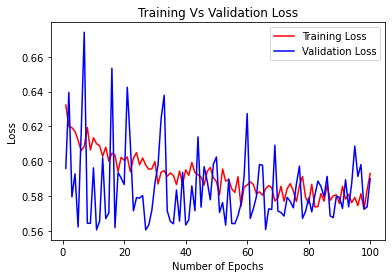

In [92]:
import matplotlib.pyplot as plt
plt.clf()
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['loss'])+1)
plt.plot(epochs, loss_values, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss_values,'b',label = 'Validation Loss')
plt.title('Training Vs Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()

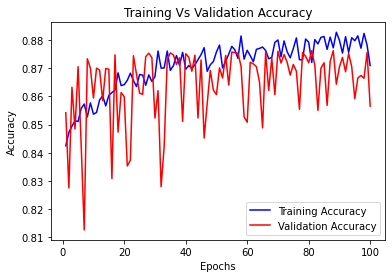

In [93]:
plt.clf()
acc_values = history_dict['acc']#[1:10]
acc_val_values = history_dict['val_acc']#[1:10]
#epochs = range(9)
plt.plot(epochs, acc_values, 'b', label = 'Training Accuracy')
plt.plot(epochs, acc_val_values, 'r', label = 'Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [103]:
y_pred_labels = model.predict(x_test)

In [109]:
y_pred = y_pred_labels>0.5
Y_Pred = y_pred*1

In [110]:
Y_Pred

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [119]:
Final_Test = (test_labels - Y_Pred)**2

In [120]:
Final_Test

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 1, 1],
       [1, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 1, 1]], dtype=int64)

In [121]:
unique, counts = np.unique(Final_Test, return_counts=True)
dict(zip(unique, counts))

{0: 312500000, 1: 312500000}